In [ ]:
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

In [ ]:
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes
import accelerate
import bitsandbytes

Looking in indexes: https://pypi.org/simple/


In [ ]:
device = "cuda"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", load_in_8bit=True, device_map={"": 0}, torch_dtype=torch.float16
)  # doctest: +IGNORE_RESULT

image = Image.open("pixel/image_0.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


a pixel art image of a woman with blue hair


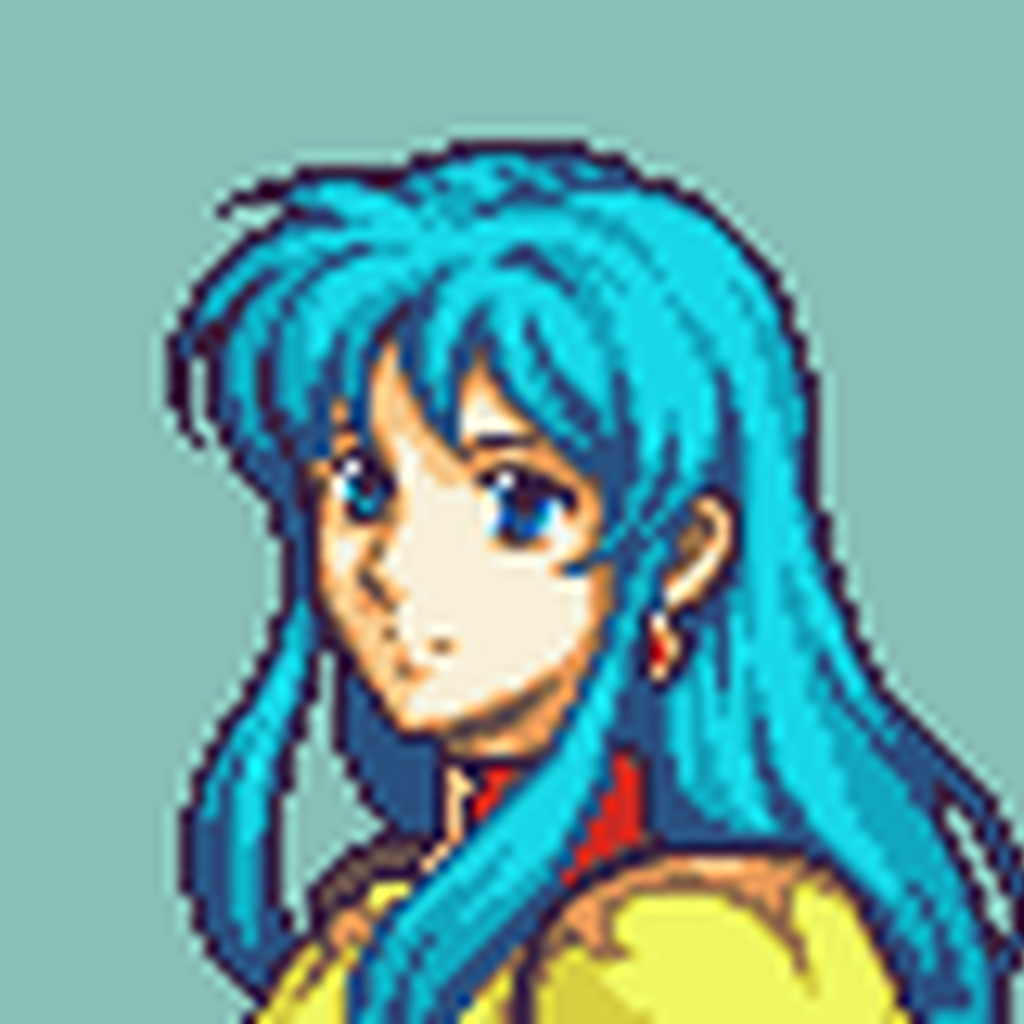

In [ ]:
image

In [ ]:
import os
import glob
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

In [ ]:
image_dir = "pixel"
output_dir = "pixel"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Process each image in the directory
for image_path in glob.glob(os.path.join(image_dir, "*.png")):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

    # Generate text
    generated_ids = model.generate(**inputs)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

    # Save the generated text to a file
    base_name = os.path.basename(image_path)
    text_file_name = os.path.splitext(base_name)[0] + '.txt'
    with open(os.path.join(output_dir, text_file_name), 'w') as text_file:
        text_file.write(generated_text)
    print(f"Processed {base_name}: {generated_text}")

Processed image_66.png: a pixel art image of a man with long hair
Processed image_97.png: an image of a pixel character with red hair
Processed image_81.png: an old woman wearing a hooded robe
Processed image_324.png: a pixel style image of a man with a beard
Processed image_337.png: a pixel style image of a man with a mustache
Processed image_208.png: a pixel art image of a knight in armor
Processed image_432.png: a pixel art girl with red hair and a red shirt
Processed image_233.png: a pixel style image of a man with a mustache
Processed image_274.png: a pixel style image of a man with a bandana
Processed image_263.png: a pixel art image of a man with brown hair
Processed image_404.png: a pixel art girl with a ponytail and a blue shirt
Processed image_348.png: a pixel style image of a man in purple armor
Processed image_15.png: a pixel art image of a male character with blonde hair
Processed image_194.png: a pixel style image of a man in armor
Processed image_349.png: a pixel art ima